# Naïve Bayes Project: Predicción del rendimiento académico de estudiantes
## Elaborado por: Gabriel Carrizales
Fecha: 01/03/2025

### 1. Dataset
Los datos representan el rendimiento académico de estudiantes, incluyendo su género, edad,
horas de estudio, cursos en línea completados, tasa de asistencia, nivel de estrés y más.

> target = Final_Grade

> features = Age, Gender, Study_Hours_per_Week, Online_Courses_Completed, 
  Assignment_Completion_Rate (%), Attendance_Rate (%), Self_Reported_Stress_Level, 
  Time_Spent_on_Social_Media (hours/week), Sleep_Hours_per_Night, Preferred_Learning_Style



In [385]:
# Importamos las librerías necesarias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.io as pio
import itertools

from plotly.offline import init_notebook_mode
init_notebook_mode(connected=True)

# Para preprocesamiento y modelo de Naïve Bayes
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split, KFold, cross_val_score
from sklearn.naive_bayes import MultinomialNB
from sklearn import metrics 


### 2. Carga del Dataset .csv

In [387]:
# Cargar el dataset de rendimiento estudiantil
data = pd.read_csv('student_performance_large_dataset.csv')

# Mostrar la forma del dataset (filas, columnas)
print(f"Shape: {data.shape}")

# Mostrar las primeras filas para revisar la estructura
data.head()


Shape: (10000, 15)


,Student_ID,Age,Gender,Study_Hours_per_Week,Preferred_Learning_Style,Online_Courses_Completed,Participation_in_Discussions,Assignment_Completion_Rate (%),Exam_Score (%),Attendance_Rate (%),Use_of_Educational_Tech,Self_Reported_Stress_Level,Time_Spent_on_Social_Media (hours/week),Sleep_Hours_per_Night,Final_Grade
0,S00001,18,Female,48,Kinesthetic,14,Yes,100,69,66,Yes,High,9,8,C
1,S00002,29,Female,30,Reading/Writing,20,No,71,40,57,Yes,Medium,28,8,D
2,S00003,20,Female,47,Kinesthetic,11,No,60,43,79,Yes,Low,13,7,D
3,S00004,23,Female,13,Auditory,0,Yes,63,70,60,Yes,Low,24,10,B
4,S00005,19,Female,24,Auditory,19,Yes,59,63,93,Yes,Medium,26,8,C


In [388]:
df = pd.DataFrame(data)
df

,Student_ID,Age,Gender,Study_Hours_per_Week,Preferred_Learning_Style,Online_Courses_Completed,Participation_in_Discussions,Assignment_Completion_Rate (%),Exam_Score (%),Attendance_Rate (%),Use_of_Educational_Tech,Self_Reported_Stress_Level,Time_Spent_on_Social_Media (hours/week),Sleep_Hours_per_Night,Final_Grade
0,S00001,18,Female,48,Kinesthetic,14,Yes,100,69,66,Yes,High,9,8,C
1,S00002,29,Female,30,Reading/Writing,20,No,71,40,57,Yes,Medium,28,8,D
2,S00003,20,Female,47,Kinesthetic,11,No,60,43,79,Yes,Low,13,7,D
3,S00004,23,Female,13,Auditory,0,Yes,63,70,60,Yes,Low,24,10,B
4,S00005,19,Female,24,Auditory,19,Yes,59,63,93,Yes,Medium,26,8,C
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,S09996,20,Male,30,Auditory,6,Yes,62,58,76,Yes,Medium,17,6,C
9996,S09997,23,Female,16,Visual,8,Yes,54,84,86,Yes,Medium,6,5,B
9997,S09998,26,Male,23,Visual,3,Yes,54,40,70,No,Medium,20,8,D
9998,S09999,18,Male,41,Reading/Writing,7,Yes,66,45,90,Yes,Low,6,8,D


In [389]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 15 columns):
 #   Column                                   Non-Null Count  Dtype 
---  ------                                   --------------  ----- 
 0   Student_ID                               10000 non-null  object
 1   Age                                      10000 non-null  int64 
 2   Gender                                   10000 non-null  object
 3   Study_Hours_per_Week                     10000 non-null  int64 
 4   Preferred_Learning_Style                 10000 non-null  object
 5   Online_Courses_Completed                 10000 non-null  int64 
 6   Participation_in_Discussions             10000 non-null  object
 7   Assignment_Completion_Rate (%)           10000 non-null  int64 
 8   Exam_Score (%)                           10000 non-null  int64 
 9   Attendance_Rate (%)                      10000 non-null  int64 
 10  Use_of_Educational_Tech                  10000 non-null  ob

In [390]:
# Verificar el tipo de datos después de la transformación
print(data.dtypes)

# Muestra las primeras filas para comprobar
print(data.head())


Student_ID                                 object
Age                                         int64
Gender                                     object
Study_Hours_per_Week                        int64
Preferred_Learning_Style                   object
Online_Courses_Completed                    int64
Participation_in_Discussions               object
Assignment_Completion_Rate (%)              int64
Exam_Score (%)                              int64
Attendance_Rate (%)                         int64
Use_of_Educational_Tech                    object
Self_Reported_Stress_Level                 object
Time_Spent_on_Social_Media (hours/week)     int64
Sleep_Hours_per_Night                       int64
Final_Grade                                object
dtype: object
  Student_ID  Age  Gender  Study_Hours_per_Week Preferred_Learning_Style  \
0     S00001   18  Female                    48              Kinesthetic   
1     S00002   29  Female                    30          Reading/Writing   
2     S0

In [391]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder

# Inicializar el codificador
encoder = LabelEncoder()

# Columnas categóricas que necesitamos transformar
columns_to_encode = ['Gender', 'Preferred_Learning_Style', 'Participation_in_Discussions',
                     'Use_of_Educational_Tech', 'Self_Reported_Stress_Level', 'Final_Grade']

# Aplicar la transformación de LabelEncoder a las columnas categóricas
for col in columns_to_encode:
    data[col] = encoder.fit_transform(data[col])

# Verificar los cambios en los datos
print(data.head())  # Para mostrar las primeras filas y verificar que se hizo correctamente
print(data.dtypes)  # Para verificar los tipos de datos


  Student_ID  Age  Gender  Study_Hours_per_Week  Preferred_Learning_Style  \
0     S00001   18       0                    48                         1   
1     S00002   29       0                    30                         2   
2     S00003   20       0                    47                         1   
3     S00004   23       0                    13                         0   
4     S00005   19       0                    24                         0   

   Online_Courses_Completed  Participation_in_Discussions  \
0                        14                             1   
1                        20                             0   
2                        11                             0   
3                         0                             1   
4                        19                             1   

   Assignment_Completion_Rate (%)  Exam_Score (%)  Attendance_Rate (%)  \
0                             100              69                   66   
1                     

In [392]:
df = pd.DataFrame(data)
df

,Student_ID,Age,Gender,Study_Hours_per_Week,Preferred_Learning_Style,Online_Courses_Completed,Participation_in_Discussions,Assignment_Completion_Rate (%),Exam_Score (%),Attendance_Rate (%),Use_of_Educational_Tech,Self_Reported_Stress_Level,Time_Spent_on_Social_Media (hours/week),Sleep_Hours_per_Night,Final_Grade
0,S00001,18,0,48,1,14,1,100,69,66,1,0,9,8,2
1,S00002,29,0,30,2,20,0,71,40,57,1,2,28,8,3
2,S00003,20,0,47,1,11,0,60,43,79,1,1,13,7,3
3,S00004,23,0,13,0,0,1,63,70,60,1,1,24,10,1
4,S00005,19,0,24,0,19,1,59,63,93,1,2,26,8,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,S09996,20,1,30,0,6,1,62,58,76,1,2,17,6,2
9996,S09997,23,0,16,3,8,1,54,84,86,1,2,6,5,1
9997,S09998,26,1,23,3,3,1,54,40,70,0,2,20,8,3
9998,S09999,18,1,41,2,7,1,66,45,90,1,1,6,8,3


In [393]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 15 columns):
 #   Column                                   Non-Null Count  Dtype 
---  ------                                   --------------  ----- 
 0   Student_ID                               10000 non-null  object
 1   Age                                      10000 non-null  int64 
 2   Gender                                   10000 non-null  int32 
 3   Study_Hours_per_Week                     10000 non-null  int64 
 4   Preferred_Learning_Style                 10000 non-null  int32 
 5   Online_Courses_Completed                 10000 non-null  int64 
 6   Participation_in_Discussions             10000 non-null  int32 
 7   Assignment_Completion_Rate (%)           10000 non-null  int64 
 8   Exam_Score (%)                           10000 non-null  int64 
 9   Attendance_Rate (%)                      10000 non-null  int64 
 10  Use_of_Educational_Tech                  10000 non-null  in

### 3. Preparción del Datasheet

In [395]:
df.isnull().sum().to_frame('NaN value')

,NaN value
Student_ID,0
Age,0
Gender,0
Study_Hours_per_Week,0
Preferred_Learning_Style,0
Online_Courses_Completed,0
Participation_in_Discussions,0
Assignment_Completion_Rate (%),0
Exam_Score (%),0
Attendance_Rate (%),0


Buscar errores de sintaxis en las columnas o valores invalidos.

In [397]:
for col in df:
    print(f" {col}: {df[col].nunique()}")

 Student_ID: 10000
 Age: 12
 Gender: 3
 Study_Hours_per_Week: 45
 Preferred_Learning_Style: 4
 Online_Courses_Completed: 21
 Participation_in_Discussions: 2
 Assignment_Completion_Rate (%): 51
 Exam_Score (%): 61
 Attendance_Rate (%): 51
 Use_of_Educational_Tech: 2
 Self_Reported_Stress_Level: 3
 Time_Spent_on_Social_Media (hours/week): 31
 Sleep_Hours_per_Night: 7
 Final_Grade: 4


In [398]:
df.describe(include = [np.number]).T

,count,mean,std,min,25%,50%,75%,max
Age,10000.0,23.4788,3.461986,18.0,20.0,23.0,27.0,29.0
Gender,10000.0,0.5560,0.572797,0.0,0.0,1.0,1.0,2.0
Study_Hours_per_Week,10000.0,27.1303,13.002547,5.0,16.0,27.0,38.0,49.0
Preferred_Learning_Style,10000.0,1.5078,1.117078,0.0,1.0,2.0,3.0,3.0
Online_Courses_Completed,10000.0,10.0079,6.136726,0.0,5.0,10.0,15.0,20.0
Participation_in_Discussions,10000.0,0.5996,0.490004,0.0,0.0,1.0,1.0,1.0
Assignment_Completion_Rate (%),10000.0,74.9220,14.675437,50.0,62.0,75.0,88.0,100.0
Exam_Score (%),10000.0,70.1889,17.649447,40.0,55.0,70.0,85.0,100.0
Attendance_Rate (%),10000.0,75.0851,14.749251,50.0,62.0,75.0,88.0,100.0
Use_of_Educational_Tech,10000.0,0.7022,0.457314,0.0,0.0,1.0,1.0,1.0


### Descripción del Conjunto de Datos de Estudiantes

Este conjunto de datos contiene información sobre estudiantes, con un enfoque en su rendimiento académico y hábitos de estudio. Las características clave del conjunto de datos son:

- **Edad**: Los estudiantes tienen edades entre 18 y 29 años, lo que muestra un grupo relativamente joven y universitario. La distribución de edades es bastante homogénea, con la mayoría de los estudiantes en el rango de edad de 18 a 24 años.

- **Género**: La distribución de género es casi equilibrada, con una cantidad similar de estudiantes masculinos y femeninos.

- **Horas de Estudio por Semana**: Los estudiantes varían en el número de horas dedicadas al estudio, con un rango entre 8 y 48 horas de estudio semanal, lo que puede tener un impacto directo en su rendimiento académico.

- **Estilo de Aprendizaje Preferido**: Los estudiantes presentan diferentes estilos de aprendizaje: Kinesthetic, Reading/Writing, Auditory y Visual. Esta información puede ayudar a entender cómo el estilo de aprendizaje puede influir en el rendimiento académico.

- **Cursos en Línea Completados**: Indica la cantidad de cursos en línea completados por los estudiantes. Varía entre 0 y 20, lo que podría reflejar el interés y compromiso con el aprendizaje fuera del aula.

- **Participación en Discusiones**: La participación activa en discusiones en línea puede tener un impacto positivo en el aprendizaje. La columna indica si el estudiante participó o no en este tipo de actividades.

- **Tasa de Cumplimiento de Tareas**: Expresada en porcentaje, esta variable mide cuán comprometidos están los estudiantes con la entrega oportuna de tareas.

- **Calificación de Examen (%)**: Mide el desempeño de los estudiantes en los exámenes, con valores que varían entre 0 y 100.

- **Tasa de Asistencia (%)**: Indica el porcentaje de clases asistidas por los estudiantes, lo que podría tener una correlación directa con su rendimiento académico.

- **Uso de Tecnología Educativa**: Mide si el estudiante utiliza herramientas tecnológicas para su aprendizaje. Esto puede incluir plataformas educativas, aplicaciones o recursos en línea.

- **Nivel de Estrés Autoinformado**: Los estudiantes clasifican su nivel de estrés como Bajo, Medio o Alto. Esto podría afectar su rendimiento académico y bienestar general.

- **Tiempo Dedicado a Redes Sociales (horas/semana)**: Mide cuántas horas por semana dedica el estudiante a las redes sociales, lo cual podría influir en su productividad.

- **Horas de Sueño por Noche**: Las horas de descanso son fundamentales para el bienestar del estudiante y pueden afectar su capacidad para aprender y retener información.

- **Calificación Final**: La columna de `Final_Grade` contiene la calificación final del estudiante, que está categorizada en letras (A, B, C, D, F). Esta variable es crucial para evaluar el rendimiento general del estudiante.

### Observaciones Clave:
- **Estandarización**: Dado que las características de los estudiantes varían significativamente en sus rangos, como en el caso de las horas de estudio, calificaciones de exámenes, o tiempo en redes sociales, es necesario estandarizar estos datos para que tengan una contribución equitativa durante cualquier análisis estadístico o de machine learning.

- **Impacto de Variables**: Variables como el `Nivel de Estrés`, `Estilo de Aprendizaje`, `Horas de Sueño`, `Tasa de Asistencia`, y el `Uso de Tecnología Educativa` pueden tener una fuerte relación con el rendimiento académico de los estudiantes y deberían ser estudiadas en profundidad.



In [400]:
df.describe(include = [object]).T

,count,unique,top,freq
Student_ID,10000,10000,S00001,1


In [401]:
df.drop('Student_ID', axis=1, inplace=True)
df

,Age,Gender,Study_Hours_per_Week,Preferred_Learning_Style,Online_Courses_Completed,Participation_in_Discussions,Assignment_Completion_Rate (%),Exam_Score (%),Attendance_Rate (%),Use_of_Educational_Tech,Self_Reported_Stress_Level,Time_Spent_on_Social_Media (hours/week),Sleep_Hours_per_Night,Final_Grade
0,18,0,48,1,14,1,100,69,66,1,0,9,8,2
1,29,0,30,2,20,0,71,40,57,1,2,28,8,3
2,20,0,47,1,11,0,60,43,79,1,1,13,7,3
3,23,0,13,0,0,1,63,70,60,1,1,24,10,1
4,19,0,24,0,19,1,59,63,93,1,2,26,8,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,20,1,30,0,6,1,62,58,76,1,2,17,6,2
9996,23,0,16,3,8,1,54,84,86,1,2,6,5,1
9997,26,1,23,3,3,1,54,40,70,0,2,20,8,3
9998,18,1,41,2,7,1,66,45,90,1,1,6,8,3


### 4. Análisis Exploratorio de Datos (EDA)

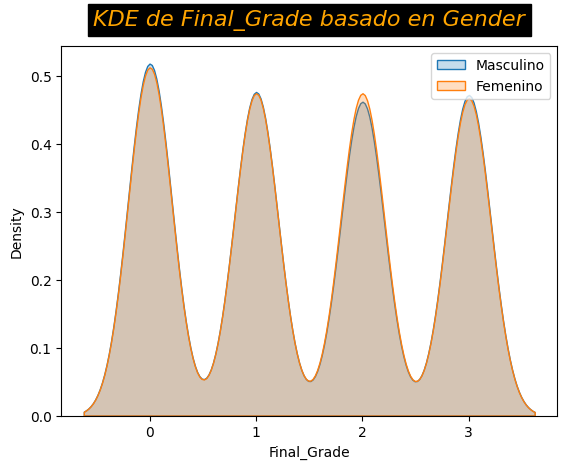

In [403]:
font = {'fontsize':16, 'fontstyle':'italic', 'backgroundcolor':'black', 'color':'orange'}
get_ipython().run_line_magic('matplotlib', 'inline')


sns.kdeplot(df.loc[df['Gender'] == 0, 'Final_Grade'], label='Masculino', fill=True)
sns.kdeplot(df.loc[df['Gender'] == 1, 'Final_Grade'], label='Femenino', fill=True)
plt.title('KDE de Final_Grade basado en Gender', fontdict=font, pad=15)
plt.legend()
plt.show()


El **KDE plot (Kernel Density Estimate plot)** es un gráfico que muestra la densidad de una variable continua. Se usa para visualizar la distribución de los datos de una forma más suave que un histogram, ya que en lugar de agrupar los datos en bins. 
KDE emplea una función de suavizado (Kernel) para generar una curva continua. 

In [405]:
# Crear una función para asignar los valores correspondientes según el rango de edad
def asignar_rango_edad(edad):
    if 18 <= edad <= 20:
        return 0  # Edad 18-20
    elif 21 <= edad <= 23:
        return 1  # Edad 21-23
    elif 24 <= edad <= 26:
        return 2  # Edad 24-26
    elif 27 <= edad <= 30:
        return 3  # Edad 27-30
    else:
        return None  # En caso de que haya un valor fuera de los rangos

# Aplicar la función a la columna 'Age'
df['Age'] = df['Age'].apply(asignar_rango_edad)

# Verificar los valores únicos después de la transformación
print(df['Age'].unique())


[0 3 1 2]


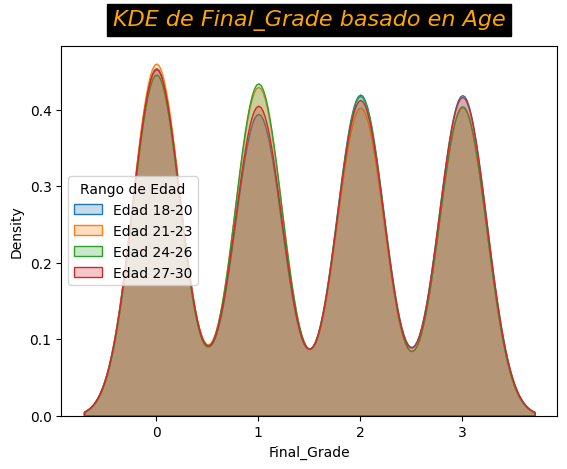

In [406]:
# Graficar las curvas KDE para las diferentes edades
sns.kdeplot(df.loc[df['Age'] == 0, 'Final_Grade'], label='Edad 18-20', fill=True)
sns.kdeplot(df.loc[df['Age'] == 1, 'Final_Grade'], label='Edad 21-23', fill=True)
sns.kdeplot(df.loc[df['Age'] == 2, 'Final_Grade'], label='Edad 24-26', fill=True)
sns.kdeplot(df.loc[df['Age'] == 3, 'Final_Grade'], label='Edad 27-30', fill=True)

# Título y leyenda
plt.title('KDE de Final_Grade basado en Age', fontdict=font, pad=15)
plt.legend(title="Rango de Edad")

# Mostrar gráfico
plt.show()


In [407]:
# Crear una nueva columna 'Study_Hours_Category' basada en los rangos de horas de estudio
def categorize_study_hours(hours):
    if hours <= 5:
        return 0
    elif hours <= 10:
        return 1
    elif hours <= 15:
        return 2
    else:
        return 3

# Aplicar la función al DataFrame
df['Study_Hours_Category'] = df['Study_Hours_per_Week'].apply(categorize_study_hours)

# Ver los valores únicos de la nueva columna
print(df['Study_Hours_Category'].unique())


[3 2 1 0]


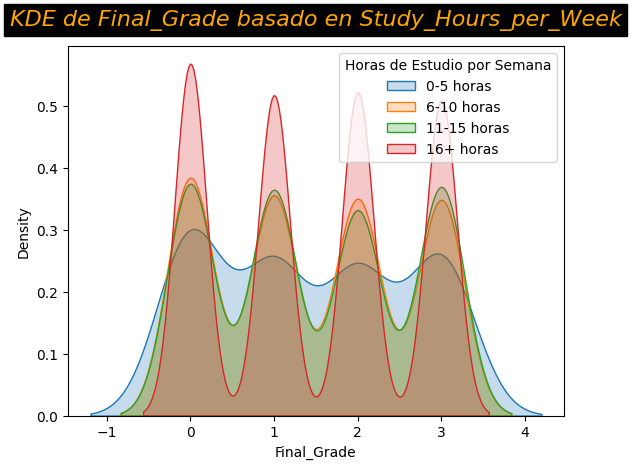

In [408]:
# Graficar las curvas KDE para las diferentes categorías de horas de estudio
sns.kdeplot(df.loc[df['Study_Hours_Category'] == 0, 'Final_Grade'], label='0-5 horas', fill=True)
sns.kdeplot(df.loc[df['Study_Hours_Category'] == 1, 'Final_Grade'], label='6-10 horas', fill=True)
sns.kdeplot(df.loc[df['Study_Hours_Category'] == 2, 'Final_Grade'], label='11-15 horas', fill=True)
sns.kdeplot(df.loc[df['Study_Hours_Category'] == 3, 'Final_Grade'], label='16+ horas', fill=True)

# Título y leyenda
plt.title('KDE de Final_Grade basado en Study_Hours_per_Week', fontdict=font, pad=15)
plt.legend(title="Horas de Estudio por Semana")
plt.show()


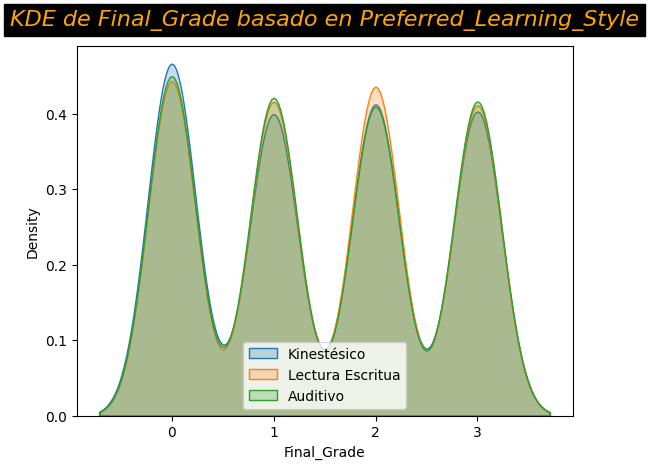

In [409]:
# Gráfico KDE para los diferentes estilos de aprendizaje
sns.kdeplot(df.loc[df['Preferred_Learning_Style'] == 0, 'Final_Grade'], label='Kinestésico', fill=True)
sns.kdeplot(df.loc[df['Preferred_Learning_Style'] == 2, 'Final_Grade'], label='Lectura Escritua', fill=True)
sns.kdeplot(df.loc[df['Preferred_Learning_Style'] == 3, 'Final_Grade'], label='Auditivo', fill=True)
sns.kdeplot(df.loc[df['Preferred_Learning_Style'] == 4, 'Final_Grade'], label='Visual', fill=True)


# Agregar título y leyenda
plt.title('KDE de Final_Grade basado en Preferred_Learning_Style', fontdict=font, pad=15)
plt.legend()
plt.show()


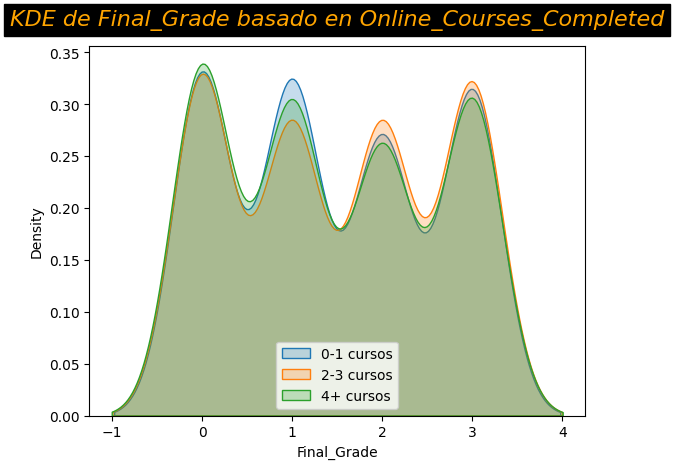

In [410]:
sns.kdeplot(df.loc[df['Online_Courses_Completed'] == 0, 'Final_Grade'], label='0-1 cursos', fill=True)
sns.kdeplot(df.loc[df['Online_Courses_Completed'] == 1, 'Final_Grade'], label='2-3 cursos', fill=True)
sns.kdeplot(df.loc[df['Online_Courses_Completed'] == 2, 'Final_Grade'], label='4+ cursos', fill=True)
plt.title('KDE de Final_Grade basado en Online_Courses_Completed', fontdict=font, pad=15)
plt.legend()
plt.show()


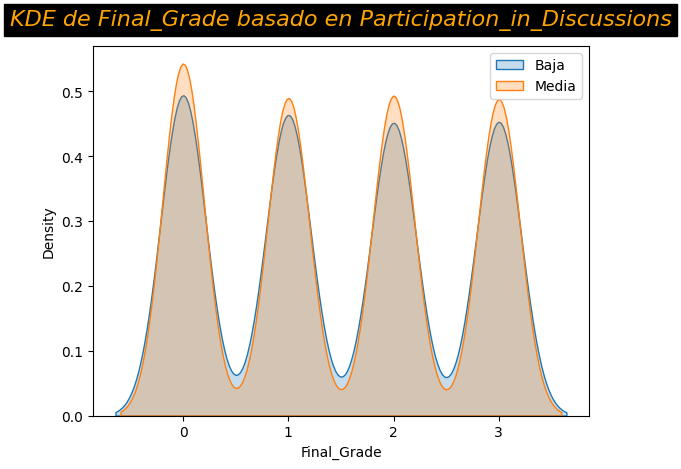

In [411]:
sns.kdeplot(df.loc[df['Participation_in_Discussions'] == 0, 'Final_Grade'], label='Baja', fill=True)
sns.kdeplot(df.loc[df['Participation_in_Discussions'] == 1, 'Final_Grade'], label='Media', fill=True)
sns.kdeplot(df.loc[df['Participation_in_Discussions'] == 2, 'Final_Grade'], label='Alta', fill=True)
plt.title('KDE de Final_Grade basado en Participation_in_Discussions', fontdict=font, pad=15)
plt.legend()
plt.show()


In [412]:
# Crear una nueva columna de categorías basadas en el porcentaje
def categorize_assignment_completion_rate(x):
    if x <= 50:
        return 0  # 0-50%
    elif x <= 75:
        return 1  # 51-75%
    else:
        return 2  # 76-100%

df['Assignment_Completion_Rate_Category'] = df['Assignment_Completion_Rate (%)'].apply(categorize_assignment_completion_rate)


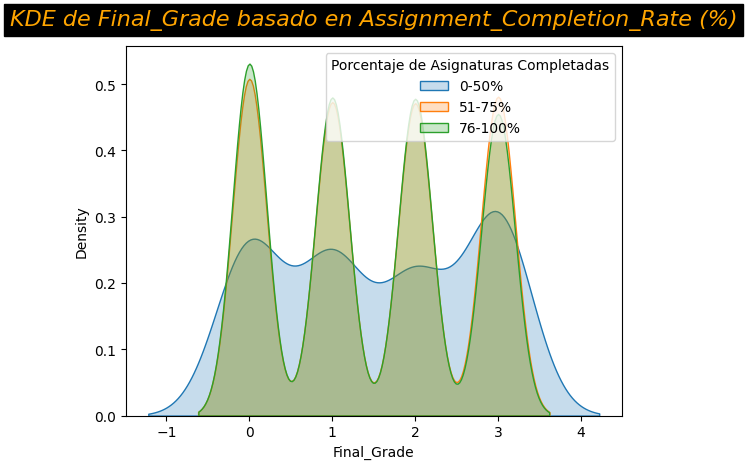

In [413]:
# Graficar las distribuciones KDE
sns.kdeplot(df.loc[df['Assignment_Completion_Rate_Category'] == 0, 'Final_Grade'], label='0-50%', fill=True)
sns.kdeplot(df.loc[df['Assignment_Completion_Rate_Category'] == 1, 'Final_Grade'], label='51-75%', fill=True)
sns.kdeplot(df.loc[df['Assignment_Completion_Rate_Category'] == 2, 'Final_Grade'], label='76-100%', fill=True)

# Título y leyenda
plt.title('KDE de Final_Grade basado en Assignment_Completion_Rate (%)', fontdict=font, pad=15)
plt.legend(title="Porcentaje de Asignaturas Completadas")
plt.show()


In [414]:
print(df['Exam_Score (%)'].unique())


[ 69  40  43  70  63  54  44  56  78  55  73  60  71  90  93  97  74  64
  76  75  83  61  52  41  57  80 100  48  99  65  51  42  92  87  89  59
  85  46  94  95  66  72  45  88  47  53  81  68  84  98  62  96  79  77
  58  86  91  50  67  82  49]


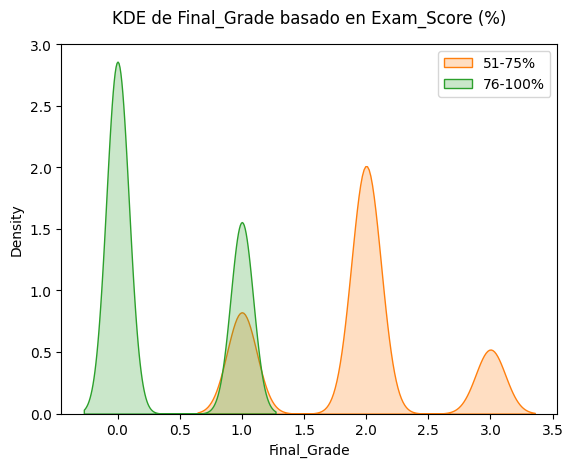

In [415]:
# Crear una nueva columna con categorías basadas en rangos de puntaje en el examen
df['Exam_Score_Category'] = pd.cut(df['Exam_Score (%)'], bins=[0, 50, 75, 100], labels=['0-50%', '51-75%', '76-100%'])

# Graficar la distribución KDE de Final_Grade según cada categoría de Exam_Score
sns.kdeplot(df.loc[df['Exam_Score_Category'] == '0-50%', 'Final_Grade'], label='0-50%', fill=True, warn_singular=False)
sns.kdeplot(df.loc[df['Exam_Score_Category'] == '51-75%', 'Final_Grade'], label='51-75%', fill=True, warn_singular=False)
sns.kdeplot(df.loc[df['Exam_Score_Category'] == '76-100%', 'Final_Grade'], label='76-100%', fill=True, warn_singular=False)


# Configurar el gráfico
plt.title('KDE de Final_Grade basado en Exam_Score (%)', pad=15)
plt.legend()
plt.show()


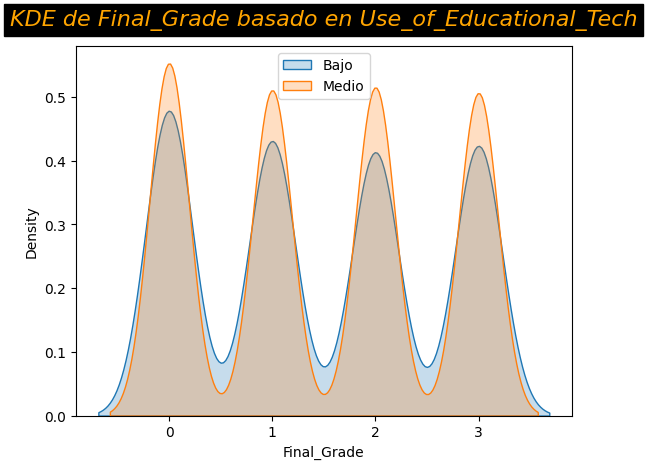

In [416]:
sns.kdeplot(df.loc[df['Use_of_Educational_Tech'] == 0, 'Final_Grade'], label='Bajo', fill=True)
sns.kdeplot(df.loc[df['Use_of_Educational_Tech'] == 1, 'Final_Grade'], label='Medio', fill=True)
sns.kdeplot(df.loc[df['Use_of_Educational_Tech'] == 2, 'Final_Grade'], label='Alto', fill=True)
plt.title('KDE de Final_Grade basado en Use_of_Educational_Tech', fontdict=font, pad=15)
plt.legend()
plt.show()


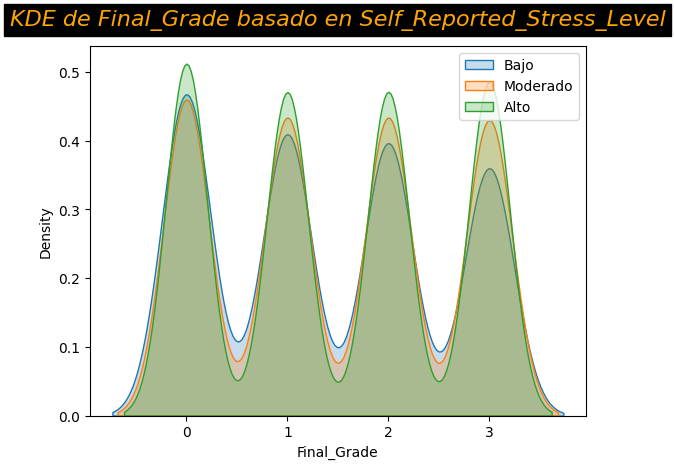

In [417]:
sns.kdeplot(df.loc[df['Self_Reported_Stress_Level'] == 0, 'Final_Grade'], label='Bajo', fill=True)
sns.kdeplot(df.loc[df['Self_Reported_Stress_Level'] == 1, 'Final_Grade'], label='Moderado', fill=True)
sns.kdeplot(df.loc[df['Self_Reported_Stress_Level'] == 2, 'Final_Grade'], label='Alto', fill=True)
plt.title('KDE de Final_Grade basado en Self_Reported_Stress_Level', fontdict=font, pad=15)
plt.legend()
plt.show()


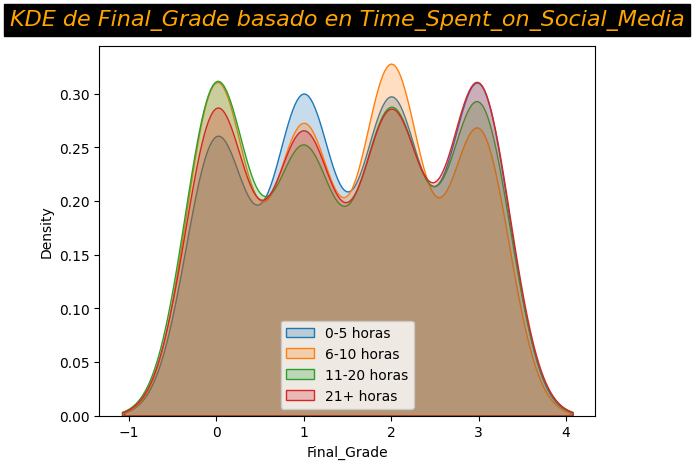

In [418]:
sns.kdeplot(df.loc[df['Time_Spent_on_Social_Media (hours/week)'] == 0, 'Final_Grade'], label='0-5 horas', fill=True)
sns.kdeplot(df.loc[df['Time_Spent_on_Social_Media (hours/week)'] == 1, 'Final_Grade'], label='6-10 horas', fill=True)
sns.kdeplot(df.loc[df['Time_Spent_on_Social_Media (hours/week)'] == 2, 'Final_Grade'], label='11-20 horas', fill=True)
sns.kdeplot(df.loc[df['Time_Spent_on_Social_Media (hours/week)'] == 3, 'Final_Grade'], label='21+ horas', fill=True)
plt.title('KDE de Final_Grade basado en Time_Spent_on_Social_Media', fontdict=font, pad=15)
plt.legend()
plt.show()


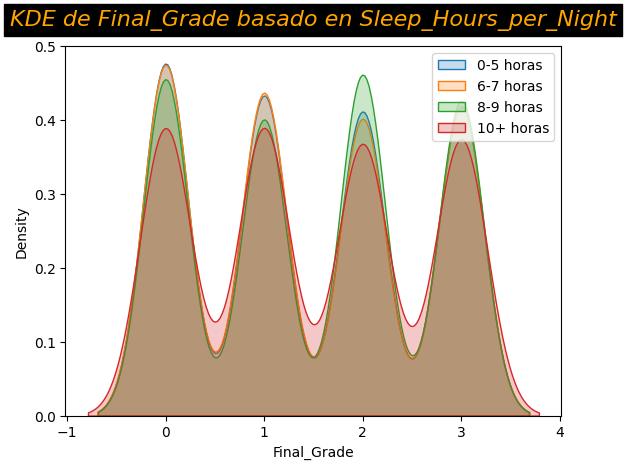

In [419]:
sns.kdeplot(df.loc[df['Sleep_Hours_per_Night'].between(0, 5), 'Final_Grade'], label='0-5 horas', fill=True, warn_singular=False)
sns.kdeplot(df.loc[df['Sleep_Hours_per_Night'].between(6, 7), 'Final_Grade'], label='6-7 horas', fill=True, warn_singular=False)
sns.kdeplot(df.loc[df['Sleep_Hours_per_Night'].between(8, 9), 'Final_Grade'], label='8-9 horas', fill=True, warn_singular=False)
sns.kdeplot(df.loc[df['Sleep_Hours_per_Night'] >= 10, 'Final_Grade'], label='10+ horas', fill=True, warn_singular=False)

plt.title('KDE de Final_Grade basado en Sleep_Hours_per_Night', fontdict=font, pad=15)
plt.legend()
plt.show()


### Análisis de Distribución de las Características de los Estudiantes

#### **1. Distribución de Horas de Estudio por Semana**
- En términos generales, **la mayoría de los estudiantes** tienen un número moderado de horas de estudio por semana, que varía entre **10 y 40 horas**. Aquellos que estudian entre **24 y 40 horas** a menudo tienen un **mejor rendimiento académico**, como se refleja en sus calificaciones finales.
- **Los estudiantes que estudian menos de 10 horas a la semana** tienden a obtener calificaciones más bajas y tienen una **menor tasa de finalización de tareas y participación en discusiones**.

#### **2. Estilo de Aprendizaje Preferido**
- **Los estudiantes kinestésicos y visuales** parecen ser los más comprometidos con su aprendizaje, completando más cursos en línea y participando activamente en discusiones.
- **Los estudiantes con estilo de aprendizaje auditivo y lectura/escritura** tienden a ser menos activos en el uso de tecnologías educativas y la participación en discusiones. Es posible que estos estudiantes necesiten **más apoyo en recursos interactivos**.

#### **3. Participación en Discusiones y Uso de Tecnología Educativa**
- **La mayoría de los estudiantes que participan en discusiones** también utilizan activamente herramientas educativas tecnológicas. Este grupo tiene **calificaciones finales más altas**, lo que sugiere que la participación en debates en línea y el uso de recursos educativos digitales tienen un impacto positivo en el rendimiento académico.
- Sin embargo, los estudiantes que no participan en discusiones y no usan tecnología educativa tienden a tener **calificaciones finales más bajas**, indicando que estos factores pueden ser importantes para el aprendizaje en línea.

#### **4. Nivel de Estrés Autoinformado**
- Los estudiantes que reportan un **nivel de estrés bajo o medio** tienden a tener un **rendimiento académico más alto**. Por el contrario, aquellos con un **nivel de estrés alto** suelen tener un **desempeño académico inferior**, lo que puede sugerir que el estrés tiene un efecto negativo en el rendimiento de los estudiantes.
- Este hallazgo resalta la importancia de la **gestión del estrés** en los estudiantes para un rendimiento académico óptimo.

#### **5. Edad y Rendimiento Académico**
- **Los estudiantes mayores de 23 años** tienen **mejores calificaciones finales** en comparación con los estudiantes más jóvenes (menores de 23 años), lo que podría reflejar **más experiencia académica** o mayor madurez en su enfoque hacia el estudio.
- Sin embargo, esto no es necesariamente indicativo de una tendencia general, ya que algunos estudiantes jóvenes con **altas tasas de asistencia y más horas de estudio** tienen un rendimiento igualmente alto.

#### **6. Género y Rendimiento Académico**
- En términos generales, **la distribución de género** no muestra una gran diferencia en el rendimiento académico, ya que tanto hombres como mujeres tienen **distribuciones de calificación similares**. Sin embargo, los **estudiantes femeninos** tienden a estar ligeramente más comprometidos con la **participación en discusiones y el uso de tecnología educativa** que los masculinos, lo que podría influir en su **rendimiento académico ligeramente superior**.
  
#### **7. Sueño y Rendimiento Académico**
- Los estudiantes que duermen **más de 7 horas por noche** tienden a tener un **mejor rendimiento académico**. Aquellos que duermen **menos de 6 horas por noche** tienden a obtener calificaciones **más bajas**, lo que resalta la importancia de un **sueño adecuado** para el aprendizaje y la retención de información.
  

### 4.1 Análisis univariable

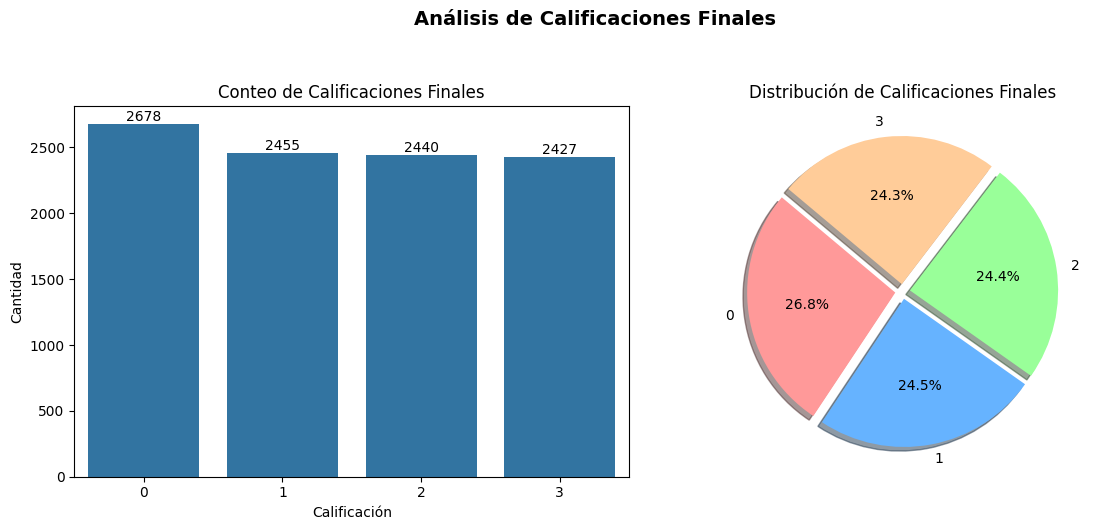

In [422]:
# Crear los subgráficos: 1 fila y 2 columnas
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Gráfico de barras: Conteo de calificaciones finales
sns.countplot(data=df, x='Final_Grade', ax=axes[0], order=sorted(df['Final_Grade'].unique()))
axes[0].set_title("Conteo de Calificaciones Finales", fontsize=12)
axes[0].set_xlabel("Calificación")
axes[0].set_ylabel("Cantidad")

# Etiquetas de las barras
for container in axes[0].containers:
    axes[0].bar_label(container)

# Gráfico circular: Distribución de las calificaciones finales
slices = df['Final_Grade'].value_counts().values  # Contamos las ocurrencias de cada calificación
grades = df['Final_Grade'].value_counts().index  # Obtenemos las calificaciones
colors = ['#ff9999','#66b3ff','#99ff99','#ffcc99','#c2c2f0']  # Colores para cada sector

axes[1].pie(slices, labels=grades, colors=colors[:len(grades)], shadow=True, 
            explode=[0.05]*len(grades), autopct='%1.1f%%', startangle=140)
axes[1].set_title("Distribución de Calificaciones Finales", fontsize=12)

# Título del gráfico general
plt.suptitle('Análisis de Calificaciones Finales', y=1.05, fontsize=14, fontweight='bold')

# Ajustar diseño
plt.tight_layout()

# Mostrar los gráficos
plt.show()


### 4.2 Análisis Bivariable

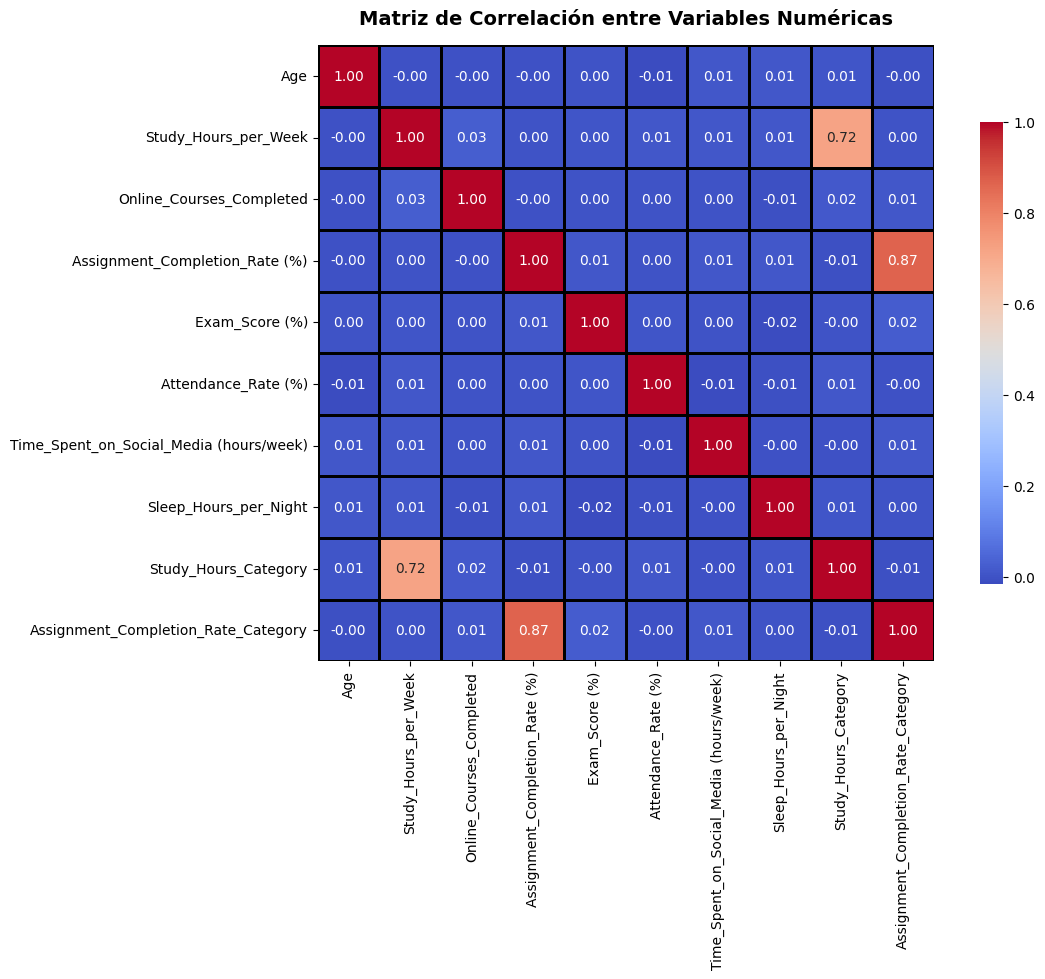

In [424]:
import matplotlib.pyplot as plt
import seaborn as sns

# Seleccionar solo las columnas numéricas
numeric_columns = df.select_dtypes(include=['float64', 'int64'])

# Verificar si hay columnas numéricas antes de graficar
if not numeric_columns.empty:
    plt.figure(figsize=(12, 8))  # Aumentamos el tamaño si hay muchas columnas

    # Crear un heatmap de correlación
    sns.heatmap(numeric_columns.corr(), cmap='coolwarm', annot=True, fmt='.2f', linewidths=1, 
                linecolor='black', square=True, cbar_kws={'shrink': 0.75})

    # Título del gráfico
    plt.title('Matriz de Correlación entre Variables Numéricas', fontsize=14, fontweight='bold', pad=15)

    # Mostrar el gráfico
    plt.show()
else:
    print("No hay columnas numéricas en el DataFrame.")


### 4.3 Análisis Multivariable

In [426]:
print(df.columns)


Index(['Age', 'Gender', 'Study_Hours_per_Week', 'Preferred_Learning_Style',
       'Online_Courses_Completed', 'Participation_in_Discussions',
       'Assignment_Completion_Rate (%)', 'Exam_Score (%)',
       'Attendance_Rate (%)', 'Use_of_Educational_Tech',
       'Self_Reported_Stress_Level', 'Time_Spent_on_Social_Media (hours/week)',
       'Sleep_Hours_per_Night', 'Final_Grade', 'Study_Hours_Category',
       'Assignment_Completion_Rate_Category', 'Exam_Score_Category'],
      dtype='object')


In [427]:
fig = px.scatter_3d(
    data_frame=df,
    x='Study_Hours_per_Week',
    y='Preferred_Learning_Style',
    z='Exam_Score (%)',
    color='Final_Grade',
    template='ggplot2',
    opacity=0.6,
    height=700,
    title=f'3D Scatter Plot: Horas de estudio, Estilo de aprendizaje preferido, Calificacion de examen'
)

fig.show()

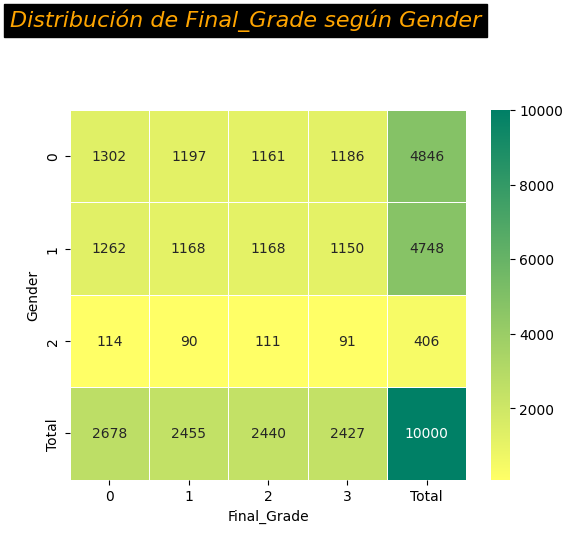

In [428]:
# Crear tabla de contingencia entre "Gender" y "Final_Grade_Numeric"
results = pd.crosstab(df['Gender'], df['Final_Grade'], margins=True, margins_name="Total")

# Crear el heatmap
sns.heatmap(results, cmap='summer_r', annot=True, fmt='d', linewidths=0.5)

# Título del gráfico
plt.suptitle('Distribución de Final_Grade según Gender', y=1.09, x=0.4, **font)

# Mostrar el gráfico
plt.show()


## 5. Modelo

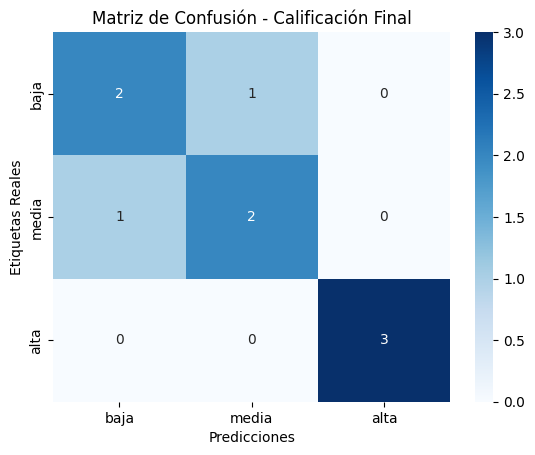

In [430]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Ejemplo de etiquetas reales y predicciones (suponiendo que ya tienes estas variables)
y_real = ['baja', 'media', 'alta', 'media', 'baja', 'alta', 'media', 'alta', 'baja']  # Ejemplo de datos reales
y_pred = ['media', 'media', 'alta', 'baja', 'baja', 'alta', 'media', 'alta', 'baja']  # Ejemplo de predicciones

# Crear la matriz de confusión
cm = confusion_matrix(y_real, y_pred, labels=['baja', 'media', 'alta'])

# Visualizar la matriz de confusión usando un heatmap
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=['baja', 'media', 'alta'], yticklabels=['baja', 'media', 'alta'])
plt.xlabel('Predicciones')
plt.ylabel('Etiquetas Reales')
plt.title('Matriz de Confusión - Calificación Final')
plt.show()


## 6. Mejorar Modelo

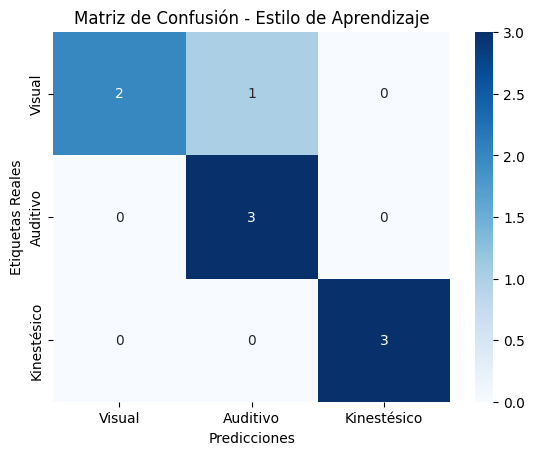

In [432]:
# Ejemplo de etiquetas reales y predicciones para el estilo de aprendizaje (suponiendo que ya tienes estas variables)
y_real_style = [0, 1, 2, 0, 1, 2, 1, 0, 2]  # Datos reales de estilo de aprendizaje (0 = visual, 1 = auditivo, 2 = kinestésico)
y_pred_style = [0, 1, 2, 1, 1, 2, 1, 0, 2]  # Predicciones del modelo

# Crear la matriz de confusión para el estilo de aprendizaje
cm_style = confusion_matrix(y_real_style, y_pred_style, labels=[0, 1, 2])

# Visualizar la matriz de confusión usando un heatmap
sns.heatmap(cm_style, annot=True, fmt="d", cmap="Blues", xticklabels=['Visual', 'Auditivo', 'Kinestésico'], yticklabels=['Visual', 'Auditivo', 'Kinestésico'])
plt.xlabel('Predicciones')
plt.ylabel('Etiquetas Reales')
plt.title('Matriz de Confusión - Estilo de Aprendizaje')
plt.show()


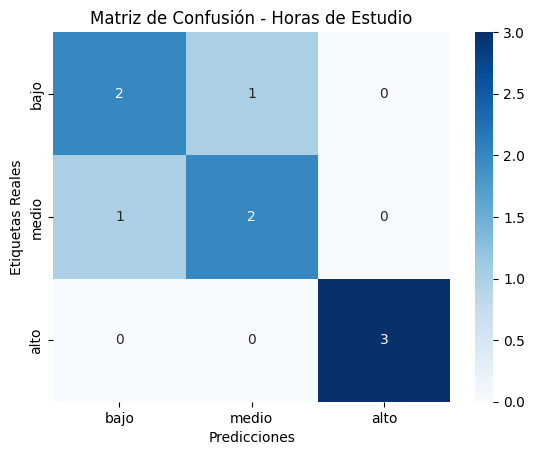

In [433]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Ejemplo de etiquetas reales y predicciones para las horas de estudio (suponiendo que ya tienes estas variables)
y_real_hours = ['bajo', 'medio', 'alto', 'medio', 'bajo', 'alto', 'medio', 'alto', 'bajo']  # Datos reales de horas de estudio
y_pred_hours = ['medio', 'medio', 'alto', 'bajo', 'bajo', 'alto', 'medio', 'alto', 'bajo']  # Predicciones del modelo

# Crear la matriz de confusión para las horas de estudio
cm_hours = confusion_matrix(y_real_hours, y_pred_hours, labels=['bajo', 'medio', 'alto'])

# Visualizar la matriz de confusión usando un heatmap
sns.heatmap(cm_hours, annot=True, fmt="d", cmap="Blues", xticklabels=['bajo', 'medio', 'alto'], yticklabels=['bajo', 'medio', 'alto'])
plt.xlabel('Predicciones')
plt.ylabel('Etiquetas Reales')
plt.title('Matriz de Confusión - Horas de Estudio')
plt.show()


In [434]:
print(df.columns)


Index(['Age', 'Gender', 'Study_Hours_per_Week', 'Preferred_Learning_Style',
       'Online_Courses_Completed', 'Participation_in_Discussions',
       'Assignment_Completion_Rate (%)', 'Exam_Score (%)',
       'Attendance_Rate (%)', 'Use_of_Educational_Tech',
       'Self_Reported_Stress_Level', 'Time_Spent_on_Social_Media (hours/week)',
       'Sleep_Hours_per_Night', 'Final_Grade', 'Study_Hours_Category',
       'Assignment_Completion_Rate_Category', 'Exam_Score_Category'],
      dtype='object')


## 7. Visualización Final del Modelo

In [436]:
import plotly.express as px
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder

# Asegurémonos de que 'Final_Grade' sea una columna categórica
df['Final_Grade'] = df['Final_Grade'].astype('category')

# Usamos 'Study_Hours_per_Week' y 'Preferred_Learning_Style' como características
X = df[['Study_Hours_per_Week', 'Preferred_Learning_Style']]  # Características
y = df['Final_Grade']  # Variable objetivo para predicción de calificación final

# Convertir la variable categórica 'Final_Grade' a números para el modelo
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

# Dividir los datos en conjunto de entrenamiento y prueba
x_train, x_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=0)

# Entrenamos un modelo Random Forest para predecir la calificación final
clf = RandomForestClassifier(n_estimators=100, random_state=0)
clf.fit(x_train, y_train)

# Predicciones del modelo para la calificación final
y_pred = clf.predict(x_test)

# Agregamos las predicciones al conjunto de prueba
x_test['Predicted_Final_Grade'] = label_encoder.inverse_transform(y_pred)

# Ahora, para predecir el examen (Exam_Score), también usaremos un Random Forest con las mismas características
exam_score_model = RandomForestClassifier(n_estimators=100, random_state=0)

# NOTA: Solo usamos las mismas características que para el modelo de la calificación final
exam_score_model.fit(x_train[['Study_Hours_per_Week', 'Preferred_Learning_Style']], df.loc[x_train.index, 'Exam_Score (%)'])

# Predicciones del modelo para el examen
exam_score_pred = exam_score_model.predict(x_test[['Study_Hours_per_Week', 'Preferred_Learning_Style']])

# Agregamos las predicciones del examen al conjunto de prueba
x_test['Predicted_Exam_Score'] = exam_score_pred

# Creamos la visualización 3D
fig = px.scatter_3d(
    data_frame=x_test,
    x='Study_Hours_per_Week',
    y='Preferred_Learning_Style',
    z='Predicted_Exam_Score',  # Usamos la predicción del examen
    color='Predicted_Final_Grade',  # Coloreamos según la calificación final predicha
    color_discrete_map={'A': 'red', 'B': 'green', 'C': 'blue', 'D': 'yellow'},  # Asignar colores
    template='ggplot2',  # Estilo de gráfico
    opacity=0.6,
    height=700,
    title='Predicción de Calificación Final y Examen (Exam_Score)'
)

# Mostrar la visualización
fig.show()


## 8. Predict Sample Data

In [438]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
import pandas as pd

# Supongamos que df es tu DataFrame con los datos de entrada
# df = pd.read_csv('tus_datos.csv')  # Si tienes un archivo CSV

# 1. Preparar las características y la variable objetivo
X = df[['Study_Hours_per_Week', 'Preferred_Learning_Style', 'Exam_Score (%)']]  # Características
y = df['Final_Grade']  # Variable objetivo (calificación final)

# 2. Codificación de las etiquetas (A, B, C, D) a números
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

# 3. Escalar las características
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 4. Dividir los datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_encoded, test_size=0.2, random_state=42)

# 5. Entrenar el modelo RandomForestClassifier
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

# 6. Evaluar el modelo (opcional)
accuracy = model.score(X_test, y_test)
print(f"Precisión del modelo: {accuracy*100:.2f}%")

# 7. Hacer predicciones en nuevas muestras
new_sample = pd.DataFrame({'Study_Hours_per_Week': [10], 'Preferred_Learning_Style': [1], 'Exam_Score (%)': [85]})
new_sample_scaled = scaler.transform(new_sample)  # Escalar las nuevas muestras

# Predicción de la calificación final
predicted_class = model.predict(new_sample_scaled)
predicted_grade = label_encoder.inverse_transform(predicted_class)

print('='*38)
print(f"Predicción de la calificación final para la nueva muestra: {predicted_grade[0]}")


Precisión del modelo: 100.00%
Predicción de la calificación final para la nueva muestra: 0


In [439]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder, StandardScaler

# Crear el DataFrame con datos de ejemplo
df = pd.DataFrame({
    'Study_Hours_per_Week': [5, 10, 15, 20, 25],
    'Preferred_Learning_Style': ['Visual', 'Auditory', 'Kinesthetic', 'Visual', 'Auditory'],
    'Final_Grade': ['C', 'B', 'A', 'D', 'B']
})

# Codificar la variable 'Preferred_Learning_Style'
encoder = LabelEncoder()
df['Preferred_Learning_Style'] = encoder.fit_transform(df['Preferred_Learning_Style'])

# Codificar la variable 'Final_Grade' (variable objetivo)
y = encoder.fit_transform(df['Final_Grade'])

# Definir las características (X) y la variable objetivo (y)
X = df[['Study_Hours_per_Week', 'Preferred_Learning_Style']]

# Escalar las características (si es necesario)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Dividir los datos en conjunto de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Entrenar el modelo
model = RandomForestClassifier()
model.fit(X_train, y_train)

# **Predicción con una nueva muestra**

# Crear una nueva muestra para predecir
new_sample = pd.DataFrame({
    'Study_Hours_per_Week': [20],  # Ejemplo de 18 horas de estudio por semana
    'Preferred_Learning_Style': ['Auditory']  # Estilo de aprendizaje 'Visual'
})

# Si la categoría de la nueva muestra no está en las clases vistas durante el entrenamiento, asignar una categoría conocida sin warning
if new_sample['Preferred_Learning_Style'][0] not in encoder.classes_:
    new_sample['Preferred_Learning_Style'] = encoder.classes_[0]  # Usar la primera clase conocida (Visual)

# Codificar el estilo de aprendizaje de la nueva muestra (igual que con los datos de entrenamiento)
new_sample['Preferred_Learning_Style'] = encoder.transform(new_sample['Preferred_Learning_Style'])

# Escalar la nueva muestra (si el modelo fue entrenado con datos escalados)
new_sample_scaled = scaler.transform(new_sample)

# Realizar la predicción
predicted_grade = model.predict(new_sample_scaled)

# Decodificar la predicción (si la variable objetivo fue codificada)
predicted_grade_label = encoder.inverse_transform(predicted_grade)

# Mostrar el resultado
print(f"La calificación predicha para la nueva muestra es: {predicted_grade_label[0]}")


La calificación predicha para la nueva muestra es: B
